# 텍스트 데이터 다루기(Handling Text Data)

## 문자열 데이터 타입
* 범주형 데이터는 고정된 목록으로 구성됩니다. 예를 들어 사람들에게 가장 좋아하는 색을 묻는 설문으로 데이터를 수집해보려고 합니다. 드롭다운(drop-down) 메뉴에서 "빨강", "노랑", "검정", "흰색", "자주", "분홍" 중 하나를 선택해야 합니다.

## 예제 애플리케이션: 영화 리뷰 감성 분석(Film Review Emotional Analysis)

In [15]:
# !은 셸(shell) 명령을 실행해주는 IPython의 매직 명령어입니다.
# tree 명령이 없다면 find ./data -type d 명령을 사용해 하위 폴더의 목록을
# 볼 수 있습니다.
!tree -dL 2 ../data/aclImdb

매개 변수가 너무 많습니다 - 2


In [10]:
!rm -r data/aclImdb/train/unsup

In [12]:
from sklearn.datasets import load_files

reviews_train = load_files("../data/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [13]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [14]:
import numpy as np
print("클래스별 샘플 수  (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수  (훈련 데이터): [12500 12500]


In [19]:
reviews_test = load_files("../data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


## 텍스트 데이터를 BOW(Bag Of Words)로 표현하기
* 머신러닝에서 텍스트를 표현하는 방법 중 BOW(Bag Of Words)는 가장 간단하지만 효과적이면서 널리 쓰이는 방법입니다. 이 방법을 쓰면 장, 문단, 문장, 서식 같은 입력 텍스트의 구조 대부분을 잃고, 각 단어가 이 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 헤아립니다. 구조와 상관없이 단어의 출현 횟수만 세기 때문에 텍스트를 담는 '가방(bag)'으로 생각할 수 있습니다.
* 전체 말뭉치에 대해 BOW 표현을 계산하려면 다음 세 단계를 거칩니다.
1. 토큰화(tokenization): 각 문서를 문서에 포함된 단어로 나눕니다. 예를 들어 공백이나 구두점 등을 기준으로 분리합니다.
2. 어휘 사전 구축. 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매깁니다(알파벳 순서).
3. 인코딩. 어휘 사전의 단어가 문서마다 몇 번이나 나타났는지를 헤아립니다.

### 샘플 데이터에 BOW 적용하기(Apply BOW to sample data)
* BOW 표현은 CountVectorizer에 변환기 인터페이스로 구현되어 있습니다. 두 샘플만 포함한 간단한 데이터셋에 적용해 어떻게 작동하는지 살펴보겠습니다.

In [6]:
bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]

* 다음과 같이 CountVectorizer를 임포트하고 객체를 맍들어 샘플 데이터에 fit 메서드를 적용합니다.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

* CountVectorizer의 fit 메서드는 훈련 데이터의 토큰으로 나누고 어휘 사전을 구축하여 vocabulary_ 속성에 저장합니다.

In [8]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [9]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [10]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 영화 리뷰에 대한 BOW(Bag Of Words about movie review)
* 지금까지 BOW 처리 과정을 자세히 짚어봤습니다. 이제 영화 리뷰에 대한 감성 분석을 적용해보겠습니다. 앞에서 IMDB 리뷰의 훈련 데이터와 테스트 데이터를 읽어서 작업할 문자열 리스트로 바꿨습니다(text_train text_test).

In [20]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n",repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [16]:
feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n",feature_names[::2000])

특성 개수: 74849
처음 20개 특성:
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성:
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성:
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("교차 검증 평균 점수: {:.2f}".format(np.mean(scores)))

C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

교차 검증 평균 점수: 0.88


C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 교차 검증 평균 점수로 88%를 얻었는데, 균형 잡힌 데이터셋에 꽤 괜찮은 이진 분류 성능입니다. LogisticRegression에는 규제 매개변수 C가 있으므로 그리드 서치를 사용해 조정해보겠습니다.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

최상의 교차 검증 점수: 0.89
최적의 매개변수:  {'C': 0.1}


C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


In [21]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names()

print("처음 50개 특성:\n", feature_names[:50])
print("20,010 부터 20,030까지 특성:\n", feature_names[20010:20030])
print("매 700번째 특성:\n", feature_names[::700])

처음 50개 특성:
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010 부터 20,030까지 특성:
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient'

In [23]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 교차 검증 점수: {:.2f}".format(grid.best_score_))

C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

최적의 교차 검증 점수: 0.89


C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 불용어(Stopword)
* 의미 없는 단어를 제거하는 또 다른 방법은 너무 빈번하여 유용하지 않은 단어를 제외하는 것입니다. 두 가지 방식이 있는데 언어별 불용어(stopword) 목록을 사용하는 것과 너무 자주 나타나는 단어를 제외하는 것입니다. scikit-learn은 feature_extraction.text 모듈에 영어의 불용어를 가지고 있습니다.

In [1]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['otherwise', 'me', 'nobody', 'once', 'again', 'see', 'amongst', 'ours', 'sometime', 'not', 'or', 'sometimes', 'by', 'ie', 'former', 'where', 'keep', 'towards', 'seeming', 'another', 'side', 'beside', 'describe', 'off', 'its', 'without', 'amoungst', 'down', 'herein', 'always', 'while', 'becomes']


* 불용어를 제외하면 특성의 개수가 이 목록의 길이(318개) 만큼만 줄어들겠지만, 성능이 향상될 수도 있습니다. 한번 시도해보겠습니다.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


* 데이터셋에서 특성이 27,271 - 26,966개, 즉 305개가 줄였습니다. 전부는 아니지만 대부분의 불용어가 포함되어 있었습니다. 그리드 서치를 다시 적용해보겠습니다.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

최상의 교차 검증 점수: 0.88


C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## tf-idf(term frequency-inverse document frequency, 단어빈도-역문서빈도)로 데이터 스케일 변경하기

$$tfidf(w,d) = tf(log(\frac{N + 1}{N_W + 1}) + 1)$$


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

최상의 교차 검증 점수: 0.89


C:\Users\wnstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다.
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다.
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름을 구합니다.
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:-20]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' ... 'tanner' 'brendan' 'muppet']


In [28]:
import numpy as np
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


## 모델 계수 조사(Investigate model coefficients)
* 자주 나타나지 않은 단어를 제외해도 특성이 27,271개나 되기 때문에 모든 계수를 한 눈에 볼 수는 없습니다. 따라서 가장 큰 값의 계수와 해당 언어를 확인하겠습니다. tf-idf 특성으로 훈련시킨 마지막 모델을 사용합니다.
* 막대 그래프는 로지스틱 회귀의 가장 큰 계수 40개와 가장 작은 계수 40개를 보여줍니다. 막대의 크기는 계수의 크기입니다.

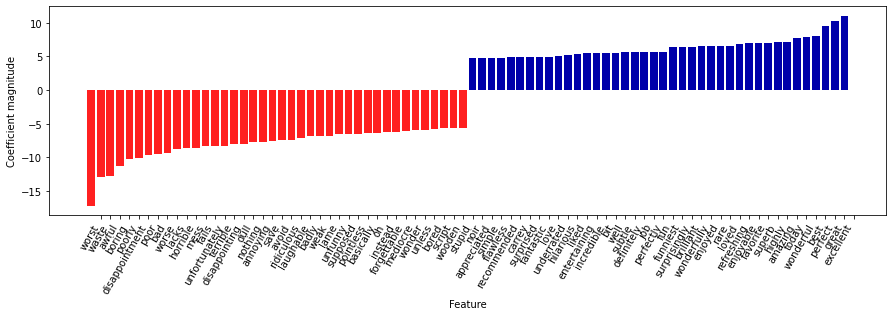

In [29]:
import mglearn
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features=40)

[tf-idf 특성으로 훈련시킨 로지스틱 회귀의 최댓값, 최솟값 계수(Maximum value, minimum value coefficient of logistic regression which trained with tf-idf property)]

## 여러 단어로 만든 BOW(n-그램)
* BOW 표현 방식은 단어의 순서가 완전히 무시된다든 큰 단점이 있습니다. 그렇기 때문에 의미가 완전히 반대인 두 문자열 "it's bad, not good at all"과 "it's good, not bad at all"이 완전히 동일하게 변환됩니다. 단어 앞에 등장하는 "not"은 (극단적일 경우) 문맥의 중요성을 잘 보여주는 예입니다. 다행히도 BOW 표현 방식을 사용할 때 문맥을 고려하는 방법이 있습니다. 토큰 하나의 횟수만 고려하지 않고 옆에 있는 두세 개의 토큰을 함께 고려하는 방식입니다. 토큰 두 개를 바이그램(bigram), 세 개를 트라이그램(trigram)이라고 하며 일반적으로 연속된 토큰을 n-그램(n-gram)이라고 합니다. CountVectorizer와 TfidfVectorizer는 ngram_range 매개변수에 특성으로 고려할 토큰의 범위를 지정할 수 있습니다. ngram_range 매개변수의 입력값은 튜플이며 연속된 토큰의 최소 길이와 최대 길이입니다. 다음은 앞에서 사용한 샘플 데이터입니다.

In [30]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


* 기본값은 최소 길이가 1이고 최대 길이가 1인 토큰마다 하나의 특성을 만듭니다. 다시 말하면 정확히 토큰 하나입니다(토큰 하나를 유니그램(unigram)이라고 합니다).

In [31]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


* 토큰 두 개가 연속된 바이그램만 만들려면 ngram_range에 (2, 2)를 지정합니다.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


* 토큰 두 개가 연속된 바이그램만 만들려면 ngram_range에 (2, 2)를 지정합니다.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 14
어휘 사전:
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


* 연속된 토큰의 수가 커지면 보통 특성이 더 구체적이고 많이 만들어집니다. bards_words에 있는 두 문장 사이에는 공통된 바이그램이 없습니다.

In [35]:
print("변환된 데이터 (밀집 배열):\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


* 단어 하나가 큰 의미를 가진 경우가 많으므로 대부분의 애플리케이션에서 토큰의 최소 길이는 1입니다. 많은 경우에 바이그램을 추가하면 도움이 됩니다. 더 길게 5-그램까지는 도움이 되지만 특성의 개수가 매우 많아지며 구체적인 특성이 많아지기 때문에 과대적합될 가능성이 있습니다. 이론상 바이그램의 수는 유니그램 수의 제곱이 되고, 트라이그램의 수는 유니그램의 세제곱이 되므로 특성의 개수가 많이 늘어납니다. (영어) 언어의 구조상 실제로 데이터에 나타나는 높은 n-그램의 횟수가 많기는 하지만 이보다는 훨씬 적습니다.
* 다음은 bards_words에 유니그램, 바이그램, 트라이그램을 적용한 예입니다.

In [36]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 39
어휘 사전:
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


* IMDB 영화 리뷰 데이터에 TfidfVectorizer를 적용하고 그리드 서치로 최적의 n-그램 범위를 찾아보겠습니다.

In [ ]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에
# 그리드 서치 실행에 시간이 오래 걸립니다.
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

* 결과에서 보듯이 바이그램과 트라이그램을 추가해서 1% 이상 성능을 높였습니다. 5장에서처럼 ngram_range와 C 매개변수에 대한 교차 검증 정확도를 히트맵으로 나타내보겠습니다.

In [ ]:
import matplotlib.pyplot as plt
import mglearn
# 그리드 서치에서 테스트 점수를 추출합니다.
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다.
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmpa="viridis", fmt="%.3f",
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [ ]:
[매개변수 ngram_range와 C에 대한 평균 교차 검증 정확도의 히트맵()]